# Regression

In diesem Kapitel werden wir uns der (linearen) Regression widmen. Dies wird es uns erlauben, dass wir Trends in 
Daten besser analysieren können.

## Methode der kleinsten Quadrate

Die Methode der kleinsten Quadrate (engl. Linear Least Squares) geht auf 
[Carl Friedrich Gauss](https://de.wikipedia.org/wiki/Carl_Friedrich_Gau%C3%9F) zurück. Ziel ist es bei dieser Methode,
dass man die Gerade findet, welche im quadratischen Mittel am dichtesten an allen Punkten liegt. Visuell sieht dies 
wie folgt aus:

```{figure} ../Bilder/Linear_least_squares_example2.png
:name: LLS

Ein Beispiel für die Methode der kleinsten Quadrate. [Quelle](https://en.wikipedia.org/wiki/Linear_least_squares)
```

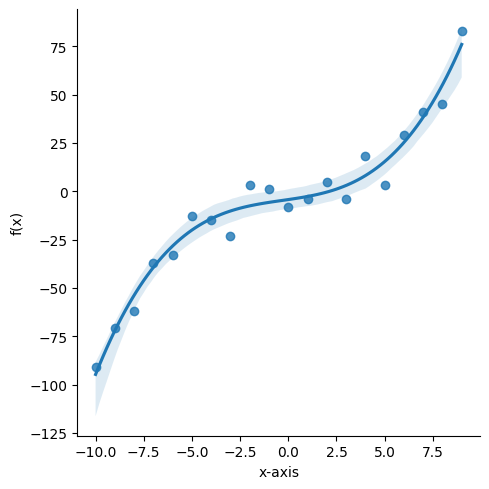

In [49]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# generieren verrauschter Daten
def gen_noisy_data(x_vals):
    f_vals = np.zeros_like(x_vals)

    for (i, x) in enumerate(x_vals):
        noise = np.random.normal(0,10,1)
        f_vals[i] = 0.1*x**3 + 0.2*x + noise

    return f_vals

x_vals = np.arange(-10, 10, 1)
data = gen_noisy_data(x_vals)

# transformieren der Daten
data = {"x-axis": x_vals, "f(x)": data}
data = pd.DataFrame(data)

# plotten mit Funktion
sb.lmplot(x='x-axis', y='f(x)', data=data, order=3)
plt.show()